In [2]:
%load_ext autoreload
%autoreload 2

import numpy  as np
import pandas as pd
import h5py

from matplotlib import pyplot as plt, cm

from common import dalt
from common import hallmark as hm
from common import viz

In [3]:
pf = hm.ParaFrame('cache/SPO2023/avg/{NGC}_a{aspin:g}_i{inc:g}_f{freq}.h5')

for k in set(pf.keys()) - {'path'}:
    globals()[k] = np.unique(pf[k])
    print(k, globals()[k][:16])

NGC ['NGC3998' 'NGC4261' 'NGC4594']
aspin [-0.94 -0.5   0.    0.5   0.94]
freq ['230.e9' '345.e9' '86.e9']
inc [ 50. 160.]


In [4]:
def readimg(f):
    with h5py.File(f) as h:
        m    = h['meta']
        meta = dalt.ImageMeta(**{k:m[k][()] for k in m.keys()})
        data = h['data'][:]
    return dalt.Image(data, meta=meta)

def plot(ax, pf):
    if len(pf) != 1:
        return
    
    if pf.freq.iloc[0] == '230GHz':
        vmax = .75e-3
    else:
        vmax = None    

    img = readimg(pf.path.iloc[0])
    print(img[:, :, 0].value)
    #print(img.values.astype(float))
    viz.show(img, s=0, ax=ax, cmap='afmhot', vmin=0, vmax=vmax, labels=False)
    ax.xaxis.set_ticks(np.linspace(-25,25,5))
    ax.yaxis.set_ticks(np.linspace(-25,25,5))
    ax.tick_params(color='w')
    for spine in ax.spines.values():
        spine.set_edgecolor('w')

/Users/caritsang/Desktop/Project/2024SURE/proj/postprocessing/2017_sgra_paper5/common/hallmark.py:28: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  mask |= self[k] == v
/Users/caritsang/Desktop/Project/2024SURE/proj/postprocessing/2017_sgra_paper5/common/hallmark.py:28: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  mask |= self[k] == v
/Users/caritsang/Desktop/Project/2024SURE/proj/postprocessing/2017_sgra_paper5/common/hallmark.py:28: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a

[[5.63597275e-18 2.85243685e-18 3.15634758e-18 ... 7.27821825e-17
  3.42827150e-17 1.75128942e-17]
 [3.15019998e-18 3.80649823e-18 5.84679764e-18 ... 1.74441480e-16
  7.90837809e-17 3.52316964e-17]
 [3.30277372e-18 6.37022318e-18 9.88956458e-18 ... 3.42439072e-16
  1.86050579e-16 7.62388449e-17]
 ...
 [5.55313743e-20 9.61855851e-20 8.76124980e-20 ... 6.40970633e-20
  2.07983093e-19 2.55741447e-19]
 [5.04582409e-20 8.72881703e-20 1.60629740e-19 ... 8.75375876e-20
  1.61852277e-19 8.90266680e-20]
 [8.58856497e-20 8.16061510e-20 1.27198948e-19 ... 7.17603011e-20
  5.38937191e-20 8.14127779e-20]]
[[1.53933577e-20 6.28567928e-21 7.08740369e-21 ... 2.96093237e-19
  1.23116496e-19 5.69767876e-20]
 [7.15392421e-21 8.61740769e-21 1.36426806e-20 ... 8.27239280e-19
  3.28333523e-19 1.27899290e-19]
 [7.25873793e-21 1.54710251e-20 2.61246391e-20 ... 1.80713841e-18
  8.94897670e-19 3.14685810e-19]
 ...
 [7.81470014e-23 1.49759840e-22 1.33211822e-22 ... 1.06164326e-22
  4.02757825e-22 5.01465787e-22]

/Users/caritsang/Desktop/Project/2024SURE/proj/postprocessing/2017_sgra_paper5/common/hallmark.py:28: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  mask |= self[k] == v


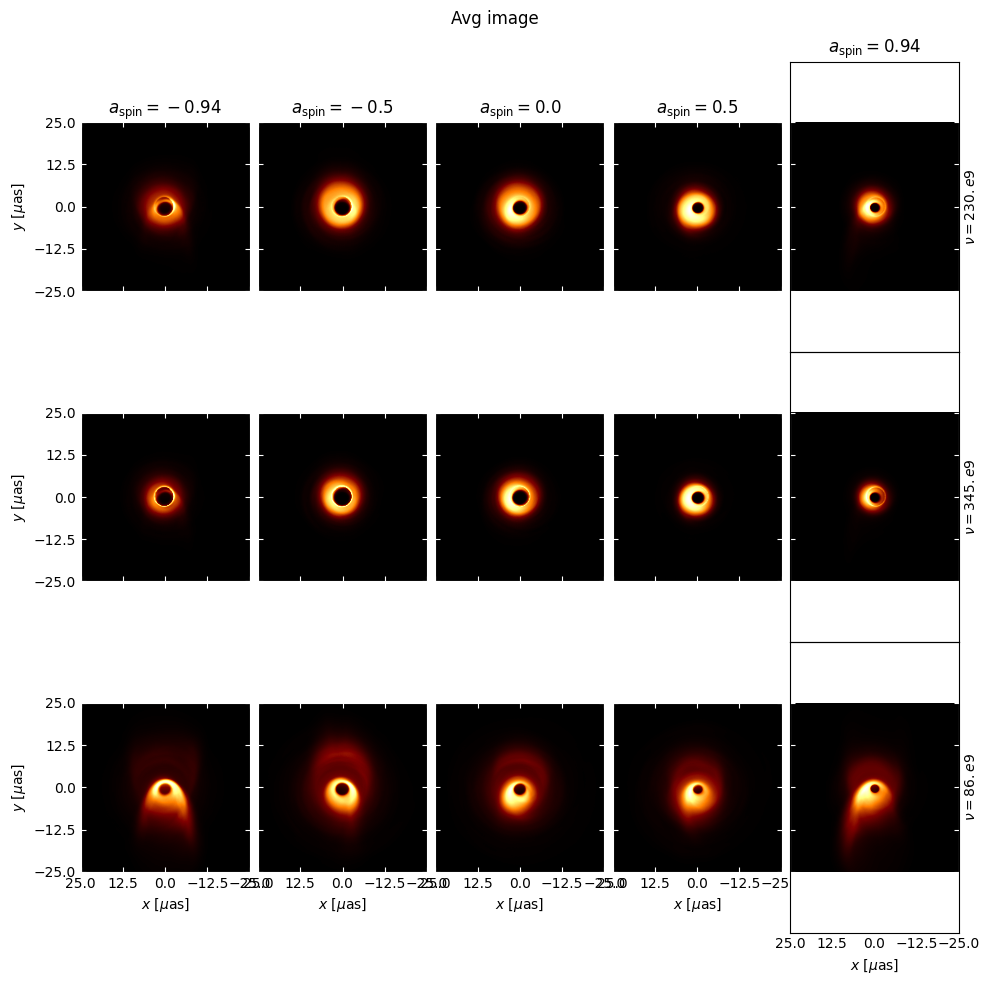

In [6]:
i = 160
a = -0.5
f = '86.e9'
fig = viz.grid(pf(NGC="NGC3998")(inc=i), plot, aspin=aspin, freq=freq,
                   figsize=(10,10), title=f'Avg image',
                   xtitle=r'$a_\mathrm{{spin}}={}$',  ytitle=r'$\nu={}$',
                   xlabel=r'$x$ [$\mu$as]', ylabel=r'$y$ [$\mu$as]', )
                   #fout=f'output/plot/test/{}_{}'.format(a,freq))
plt.show()
plt.close(fig)